In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('diabetes.csv')
target = 'Outcome'
X = df.drop([target],axis = 1)
y = df[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

def results(train,test):
    print(f"Testing accuracy : {round(test,2)}")
    print(f"Training accuracy : {round(train,2)}")

#### Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)
results(model.score(X_train,y_train),model.score(X_test,y_test))

Testing accuracy : 0.76
Training accuracy : 1.0


Cleary an overfit model

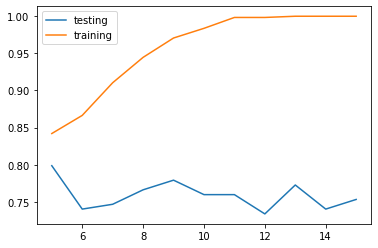

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

ticks = range(5,16)
test = []
train = []
for deep in ticks:
    model = DecisionTreeClassifier(max_depth=deep).fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))

sns.lineplot(x = ticks,y = test,label = 'testing')
sns.lineplot(x = ticks,y = train,label = 'training')
plt.legend()
plt.show()

##### Visualizing Decision Tree

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file = 'model_tree.dot',class_names = ["True","False"],feature_names = X.columns,impurity = False,filled = True)

In [6]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import graphviz 
with open("model_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
results(model.score(X_train,y_train),model.score(X_test,y_test))

Testing accuracy : 0.75
Training accuracy : 1.0


> Cleary an overfitted model


+ Hyperparameters for Random 
1. **n_estimators** (number of trees):
   - Range: Typically between 10 and 1000.
   - This hyperparameter determines the number of decision trees in the forest.

2. **criterion** (impurity measure):
   - Values: "gini" (default) or "entropy."
   - It specifies the function used to measure the quality of a split.

3. **max_depth** (maximum depth of the trees):
   - Range: Usually between 1 and the number of features.
   - It limits the maximum depth of individual decision trees to control overfitting.

4. **min_samples_split** (minimum samples for a node to split):
   - Range: Typically between 2 and 20.
   - It defines the minimum number of samples required to split an internal node.

5. **min_samples_leaf** (minimum samples for a leaf node):
   - Range: Usually between 1 and 20.
   - This hyperparameter sets the minimum number of samples required to be in a leaf node.

6. **max_features** (number of features to consider for the best split):
   - Values: "auto" (default), "sqrt," "log2," or a float (e.g., 0.5).
   - It determines the number of features to consider when looking for the best split.

7. **bootstrap** (sampling with replacement):
   - Values: True (default) or False.
   - It specifies whether the data should be sampled with or without replacement when building trees.

8. **random_state** (seed for random number generator):
   - Range: An integer or None.
   - It controls the randomness of the algorithm for reproducibility.

9. **class_weight** (weights for class imbalance):
   - Values: "balanced" or a dictionary.
   - It can be used to assign weights to classes to handle imbalanced datasets.

10. **oob_score** (out-of-bag score estimation):
    - Values: True or False.
    - When True, it calculates the out-of-bag error estimate.

11. **verbose** (verbosity level):
    - Range: 0 (quiet) to 3 (verbose).
    - It controls the amount of information printed during training.

12. **min_impurity_decrease** (minimum impurity decrease required for split):
    - Range: A small positive float.
    - It sets a threshold for the minimum reduction in impurity required to make a split.


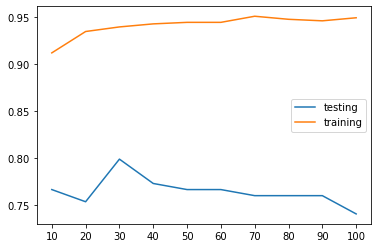

Max accuracy : 0.7987012987012987


In [25]:
trees = range(10,101,10)
train = []
test = []

for tree in trees:
    model = RandomForestClassifier(n_estimators=tree,max_features=3,max_depth=7,random_state=0).fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))


sns.lineplot(x = trees,y = test,label = 'testing')
sns.lineplot(x = trees,y = train,label = 'training')

plt.xticks(trees)
plt.legend()
plt.show()

print(f"Max accuracy : {max(test)}")

### Gradient Boosted Trees

1. **n_estimators** (number of boosting stages):
   - Range: Typically between 50 and 1000.
   - This hyperparameter determines the number of weak learners (trees) to be used in the ensemble.

2. **learning_rate** (shrinkage factor):
   - Range: Usually between 0.01 and 1.0.
   - It controls the contribution of each weak learner to the ensemble. Smaller values require more weak learners for equivalent model complexity.

3. **max_depth** (maximum depth of individual trees):
   - Range: Typically between 3 and 10.
   - This hyperparameter limits the maximum depth of each decision tree in the ensemble.

4. **min_samples_split** (minimum samples required for node split):
   - Range: Typically between 2 and 20.
   - It sets the minimum number of samples required to split an internal node in each decision tree.

5. **min_samples_leaf** (minimum samples required for a leaf node):
   - Range: Usually between 1 and 20.
   - This hyperparameter specifies the minimum number of samples required to form a leaf node in each decision tree.

6. **subsample** (fraction of samples used for training each tree):
   - Range: Usually between 0.1 and 1.0.
   - It controls the fraction of the training data used for fitting each tree, which can help prevent overfitting.

7. **max_features** (number of features to consider for the best split):
   - Values: "auto," "sqrt," "log2," or a float (e.g., 0.5).
   - It determines the number of features to consider when looking for the best split in each tree.

8. **loss** (loss function for gradient boosting):
   - Values: "deviance" (default) for classification or "ls" for regression.
   - It specifies the loss function to be optimized during training.

9. **random_state** (seed for random number generator):
   - Range: An integer or None.
   - It controls the randomness of the algorithm for reproducibility.

10. **criterion** (impurity measure for tree building):
    - Values: "friedman_mse," "mse," or "mae."
    - It determines the function used to measure the quality of a split in each tree.

11. **warm_start** (reuse previous solution):
    - Values: True or False.
    - When True, it allows for incremental training, which can be useful for adding more trees to an existing model.

12. **verbose** (verbosity level):
    - Range: 0 (quiet) to 3 (verbose).
    - It controls the amount of information printed during training.

13. **validation_fraction** (fraction of training data for early stopping):
    - Range: Usually between 0.1 and 0.3.
    - It specifies the fraction of the training data to set aside as a validation set for early stopping.

14. **n_iter_no_change** (number of iterations with no improvement for early stopping):
    - Range: Typically between 5 and 20.
    - It determines the number of iterations with no improvement on the validation set before training stops.

15. **early_stopping** (enable or disable early stopping):
    - Values: True or False.
    - When True, it enables early stopping based on the validation set performance.

16. **tol** (tolerance for early stopping):
    - Range: A small positive float.
    - It sets the threshold for early stopping based on the validation set performance.

17. **init** (initialization of the ensemble):
    - Values: "zero," "random," or an estimator object.
    - It specifies how the initial ensemble is constructed.

18. **max_leaf_nodes** (maximum number of leaf nodes):
    - Range: Typically between 10 and 50.
    - This hyperparameter limits the total number of leaf nodes in each decision tree.

19. **min_impurity_decrease** (minimum impurity decrease for split):
    - Range: A small positive float.
    - It sets a threshold for the minimum reduction in impurity required to make a split in each tree.

20. **min_weight_fraction_leaf** (minimum weighted fraction for leaf nodes):
    - Range: A small positive float.
    - It specifies the minimum weighted fraction of the input samples required to form a leaf node.

21. **presort** (presort data for faster training):
    - Values: True or False.
    - When True, it can speed up training for small datasets but is generally not recommended for large datasets.

These are some of the most commonly used hyperparameters for Gradient Boosted Trees. The optimal values for these hyperparameters may vary depending on the dataset and problem you are working on. **To find the best hyperparameters, you can use techniques like grid search or random search combined with cross-validation.**


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train,y_train)
results(model.score(X_train,y_train),model.score(X_test,y_test))

Testing accuracy : 0.75
Training accuracy : 0.94


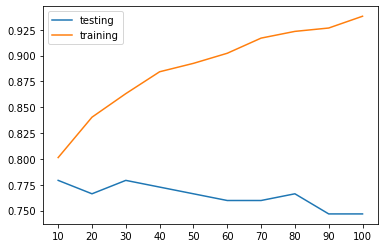

Max accuracy : 0.7792207792207793


In [44]:
trees = range(10,101,10)
train = []
test = []

for tree in trees:
    model = GradientBoostingClassifier(n_estimators=tree,max_depth=3,learning_rate=0.1,random_state=0).fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))


sns.lineplot(x = trees,y = test,label = 'testing')
sns.lineplot(x = trees,y = train,label = 'training')

plt.xticks(trees)
plt.legend()
plt.show()

print(f"Max accuracy : {max(test)}")